In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import skew

![](https://www.crystalgraphicsimages.com/photo/red-varietal-wine-grape-clusters-vine-autumn-harvest_cg3p7139782c_th.jpg)

In [2]:
wine0 = pd.read_csv('wine.csv')

In [3]:
wine = wine0.copy()

In [4]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Wine                    178 non-null int64
Alcohol                 178 non-null float64
Malic.acid              178 non-null float64
Ash                     178 non-null float64
Acl                     178 non-null float64
Mg                      178 non-null int64
Phenols                 178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid.phenols    178 non-null float64
Proanth                 178 non-null float64
Color.int               178 non-null float64
Hue                     178 non-null float64
OD                      178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
# 1st column Barbera #2nd column Barolo #3 Grignolino

In [8]:
wine['Wine_name'] = wine.Wine
wine0['Wine_name'] = wine0.Wine

In [9]:
### wine['Wine_name'][wine.Wine == 1] = 'Barbera'
#wine['Wine_name'][wine.Wine == 2] = 'Barolo'
#wine['Wine_name'][wine.Wine == 3] = 'Grignolino'

wine.Wine_name.replace({1:'Barbera', 2:'Barolo', 3:'Gringnolio'}, inplace = True)
wine0.Wine_name.replace({1:'Barbera', 2:'Barolo', 3:'Gringnolio'}, inplace = True)

In [10]:
wine0.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine_name
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Barbera
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Barbera
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Barbera
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Barbera
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Barbera


In [11]:
wine0.Wine_name.dtype

dtype('O')

In [12]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine_name
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Barbera
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Barbera
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Barbera
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Barbera
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Barbera


In [13]:
pd.crosstab(wine0['Wine'],wine0['Wine_name'])

Wine_name,Barbera,Barolo,Gringnolio
Wine,,,
1,59,0,0
2,0,71,0
3,0,0,48


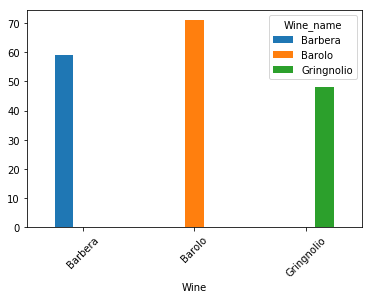

In [14]:
pd.crosstab(wine['Wine'],wine['Wine_name']).plot.bar()
plt.xticks([0,1,2],['Barbera','Barolo','Gringnolio'], rotation =45 )
plt.show()

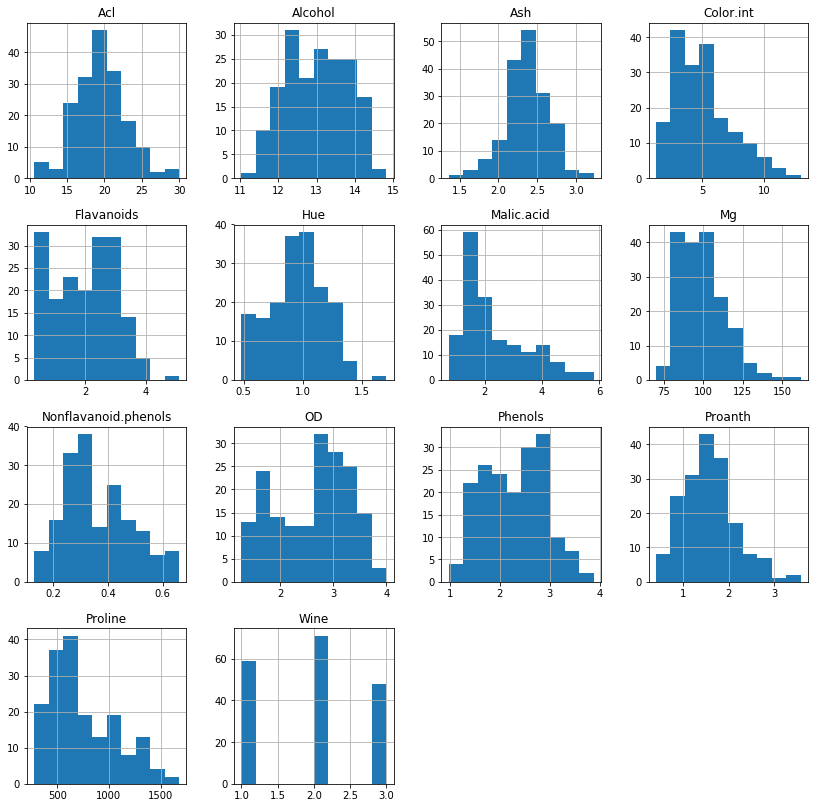

In [15]:
wine.hist(figsize = (14,14))
plt.show()

In [16]:
skew(wine['Nonflavanoid.phenols'], axis = 0, bias = True)

0.44634901064702254

In [17]:
#skew(wine['Proline'], axis = 0, bias = True)

for i in wine.columns[0: -1]:
    #skew(wine[i], axis = 0, bias = True)
    print(i, str(skew(wine[i], axis = 0, bias = True)))


Wine 0.1065236775609526
Alcohol -0.05104747165391963
Malic.acid 1.0308694978039965
Ash -0.1752067779256028
Acl 0.21124732832155219
Mg 1.088914887210701
Phenols 0.08590677016719508
Flavanoids 0.025129482208428075
Nonflavanoid.phenols 0.44634901064702254
Proanth 0.5127690334109938
Color.int 0.8612480547740544
Hue 0.020913119068882775
OD -0.30468992894361013
Proline 0.7613361671993626


In [18]:
wine1 = wine0.copy()

In [19]:
np.var(wine0)

Wine                        0.597305
Alcohol                     0.655360
Malic.acid                  1.241004
Ash                         0.074842
Acl                        11.090031
Mg                        202.843328
Phenols                     0.389489
Flavanoids                  0.992114
Nonflavanoid.phenols        0.015402
Proanth                     0.325754
Color.int                   5.344256
Hue                         0.051951
OD                          0.501254
Proline                 98609.600966
dtype: float64

In [20]:
def log_wine(x):
    log = skew(np.log(x))
    return log

In [21]:
log_wine(wine1[['Malic.acid','Mg','Nonflavanoid.phenols','Proanth', 
                 'Color.int', 'OD', 'Proline']])

array([ 0.27229375,  0.59636442, -0.21754421, -0.72177344, -0.07978426,
       -0.65377704,  0.08608944])

In [22]:
def sqrt_wine(x):
    sqrt = skew(np.sqrt(x))
    return sqrt

In [23]:
sqrt_wine(wine1[['Malic.acid','Mg','Nonflavanoid.phenols','Proanth', 
                 'Color.int', 'OD', 'Proline']])

array([ 0.66856209,  0.83115092,  0.13685219, -0.07778845,  0.39232193,
       -0.47924099,  0.43207015])

In [24]:
def sqrt1_wine(x):
    sqrt1 = skew(1/np.sqrt(x))
    return sqrt1

In [25]:
sqrt1_wine(wine1[['Malic.acid','Mg','Nonflavanoid.phenols','Proanth', 
                 'Color.int', 'OD', 'Proline']])

array([ 0.18587706, -0.37934749,  0.63280484,  1.46215341,  0.58193521,
        0.83051798,  0.28209526])

In [26]:
np.var(wine1)

Wine                        0.597305
Alcohol                     0.655360
Malic.acid                  1.241004
Ash                         0.074842
Acl                        11.090031
Mg                        202.843328
Phenols                     0.389489
Flavanoids                  0.992114
Nonflavanoid.phenols        0.015402
Proanth                     0.325754
Color.int                   5.344256
Hue                         0.051951
OD                          0.501254
Proline                 98609.600966
dtype: float64

In [27]:
wine123 = wine0.copy()

In [28]:
wine1['Color.int'] = (np.log(wine1['Color.int']))

wine1['Proline'] = (np.log(wine1['Proline']))

wine1['Nonflavanoid.phenols'] = (np.sqrt(wine1['Nonflavanoid.phenols']))
wine1['Proanth'] = (np.sqrt(wine1['Proanth']))
wine1['OD'] = (np.sqrt(wine1['OD']))

wine1['Malic.acid'] = (1/np.sqrt(wine1['Malic.acid']))
wine1['Mg'] = (1/np.sqrt(wine1['Mg']))

In [29]:
wine1.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine_name
0,1,14.23,0.764719,2.43,15.6,0.088736,2.80,3.06,0.529150,1.513275,1.729884,1.04,1.979899,6.970730,Barbera
1,1,13.20,0.749532,2.14,11.2,0.100000,2.65,2.76,0.509902,1.131371,1.477049,1.05,1.843909,6.956545,Barbera
2,1,13.16,0.650945,2.67,18.6,0.099504,2.80,3.24,0.547723,1.676305,1.736951,1.03,1.780449,7.077498,Barbera
3,1,14.37,0.716115,2.50,16.8,0.094072,3.85,3.49,0.489898,1.476482,2.054124,0.86,1.857418,7.299797,Barbera
4,1,13.24,0.621370,2.87,21.0,0.092057,2.80,2.69,0.624500,1.349074,1.463255,1.04,1.711724,6.599870,Barbera


In [30]:
for i in wine1.columns[0: -1]:
    #skew(wine[i], axis = 0, bias = True)
    print(i, str(skew(wine1[i], axis = 0, bias = True)))

Wine 0.1065236775609526
Alcohol -0.05104747165391963
Malic.acid 0.18587705925288148
Ash -0.1752067779256028
Acl 0.21124732832155219
Mg -0.3793474885952275
Phenols 0.08590677016719508
Flavanoids 0.025129482208428075
Nonflavanoid.phenols 0.13685219234141516
Proanth -0.07778844902307745
Color.int -0.07978426417668119
Hue 0.020913119068882775
OD -0.47924099227008055
Proline 0.08608944276120138


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [32]:
X_1 = wine1.drop(['Wine', 'Wine_name'], axis = 1).values
y_1 = wine1.Wine_name

In [33]:
y_1.value_counts()

Barolo        71
Barbera       59
Gringnolio    48
Name: Wine_name, dtype: int64

In [34]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, test_size = 0.2, random_state = 1)

In [35]:
print(y_train_1.value_counts(), '\n\n', y_test_1.value_counts())

Barolo        58
Barbera       45
Gringnolio    39
Name: Wine_name, dtype: int64 

 Barbera       14
Barolo        13
Gringnolio     9
Name: Wine_name, dtype: int64


In [36]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters = 3)
kmeans.fit_predict(X_train_1)

array([1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2], dtype=int32)

In [37]:
kmeans.fit_predict(X_1)

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0], dtype=int32)

In [38]:
save_file = wine1
save_file['Prediction of Wine'] = kmeans.fit_predict(X_1)
save_file[['Wine_name', 'Prediction of Wine']].to_csv('Wine_Data_cluster.csv')
#Download test results to file with wine prediction included for wine 1.

In [39]:
from sklearn.preprocessing import LabelEncoder

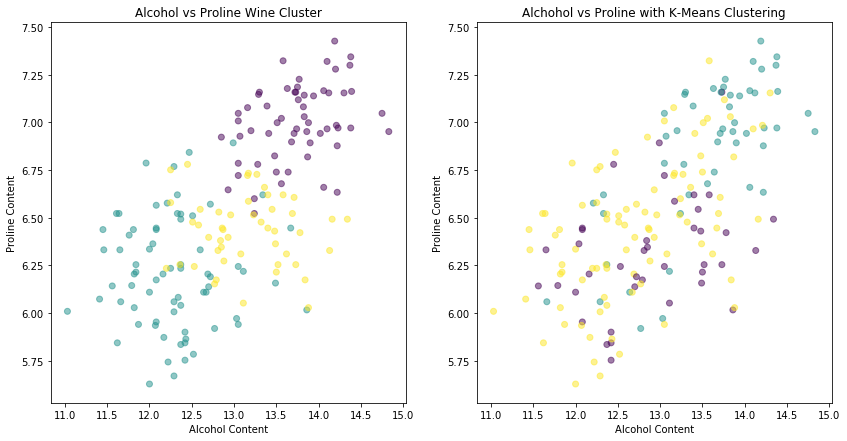

In [40]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(wine1['Alcohol'], wine1['Proline'], c = LabelEncoder().fit_transform(y_1), alpha = 0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Proline Content')
plt.title('Alcohol vs Proline Wine Cluster')
plt.subplot(1, 2, 2)
plt.scatter(wine1['Alcohol'], wine1['Proline'], c = kmeans.fit_predict(X_1), alpha = 0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Proline Content')
plt.title('Alchohol vs Proline with K-Means Clustering')
plt.show()

In [41]:
X_0 = wine0.drop(['Wine', 'Wine_name'], axis = 1).values
y_0 = wine0.Wine_name

In [42]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0,y_0, test_size = 0.2, random_state = 1)

In [43]:
kmeans = KMeans(n_clusters=3)
a_0 = kmeans.fit_predict(X_test_0)

In [44]:
pd.crosstab([a_0],[y_test_0])

Wine_name,Barbera,Barolo,Gringnolio
row_0,,,
0,7,2,0
1,0,11,9
2,7,0,0


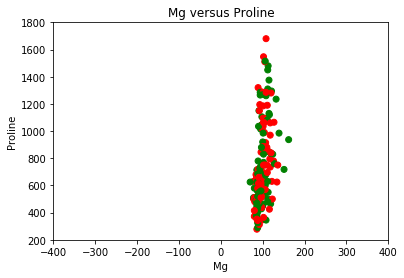

In [45]:
plt.scatter(x = (wine0.Mg), y = (wine0.Proline), c = 'RG')
plt.xlim(-400,400)
plt.ylim(200,1800)
plt.xlabel('Mg')
plt.ylabel('Proline')
plt.title('Mg versus Proline')
plt.show()

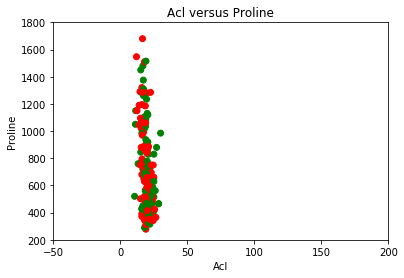

In [46]:
plt.scatter(x = (wine0.Acl), y = (wine0.Proline), c = 'RG')
plt.xlim(-50,200)
plt.ylim(200,1800)
plt.xlabel('Acl')
plt.ylabel('Proline')
plt.title('Acl versus Proline')
plt.show()

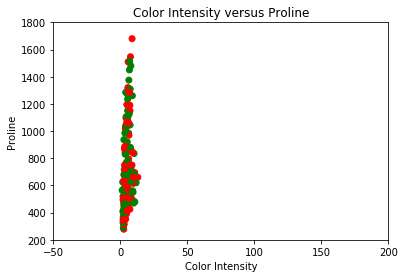

In [47]:
plt.scatter(x = (wine0['Color.int']), y = (wine0.Proline), c = 'RG')
plt.xlim(-50,200)
plt.ylim(200,1800)
plt.xlabel('Color Intensity')
plt.ylabel('Proline')
plt.title('Color Intensity versus Proline')
plt.show()

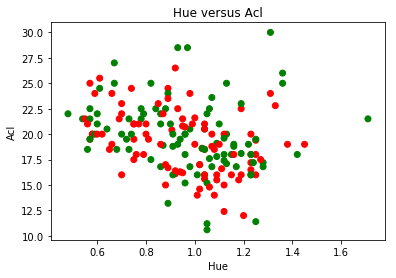

In [48]:
plt.scatter(x = (wine0.Hue), y = (wine0.Acl), c = 'RG')
plt.xlabel('Hue')
plt.ylabel('Acl')
plt.title('Hue versus Acl')
plt.show()

In [49]:
# wine0 applying standard scaler to remove huge variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_test_0))
StandardScaler(copy=True, with_mean=True, with_std=True)

X_testscal_0 = scaler.transform(X_test_0)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [50]:
kmeans = KMeans(n_clusters=3)
a_0 = kmeans.fit_predict(X_testscal_0)

In [51]:
pd.crosstab([a_0],[y_test_0])

Wine_name,Barbera,Barolo,Gringnolio
row_0,,,
0,14,1,0
1,0,0,8
2,0,12,1


In [52]:
# wine1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_test_1))
StandardScaler(copy=True, with_mean=True, with_std=True)

X_testscal_1 = scaler.transform(X_test_1)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [53]:
kmeans = KMeans(n_clusters=3)
a_1 = kmeans.fit_predict(X_testscal_1)

In [54]:
pd.crosstab([a_1],[y_test_0])

Wine_name,Barbera,Barolo,Gringnolio
row_0,,,
0,14,1,0
1,0,11,0
2,0,1,9


In [55]:
X_3 = wine0.drop(['Wine', 'Wine_name'], axis = 1)
y_4 = wine0.Wine_name

/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


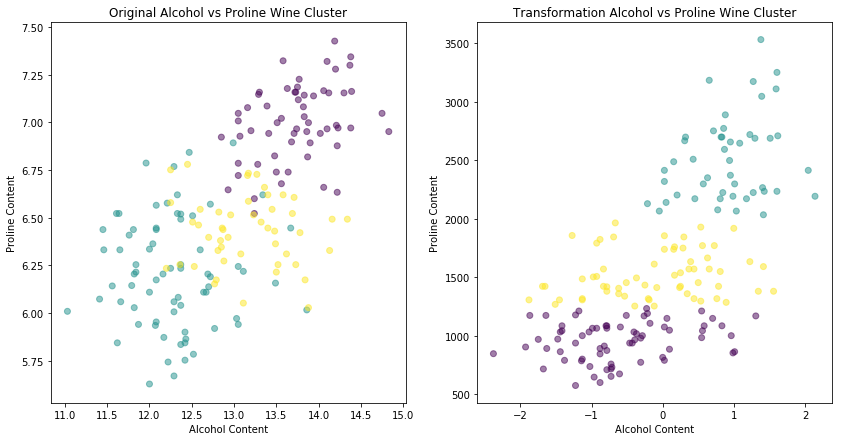

In [56]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(wine1['Alcohol'], wine1['Proline'], c = LabelEncoder().fit_transform(y_1), alpha = 0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Proline Content')
plt.title('Original Alcohol vs Proline Wine Cluster')
plt.subplot(1, 2, 2)
plt.scatter(pd.DataFrame(scaler.transform(X_3))[0], pd.DataFrame(scaler.transform(X_3))[12], c = kmeans.fit_predict(X_3), alpha = 0.5)
plt.xlabel('Alcohol Content')
plt.ylabel('Proline Content')
plt.title('Transformation Alcohol vs Proline Wine Cluster')
plt.show()

In [57]:
pd.crosstab([a_1],[y_test_1])

Wine_name,Barbera,Barolo,Gringnolio
row_0,,,
0,14,1,0
1,0,11,0
2,0,1,9


In [58]:
save_file = wine0
save_file['Prediction of Wine'] = kmeans.fit_predict(X_3)
save_file[['Wine_name', 'Prediction of Wine']].to_csv('Wine_Data_cluster_wine0.csv')
#Download test results to file with wine prediction included for wine 0.

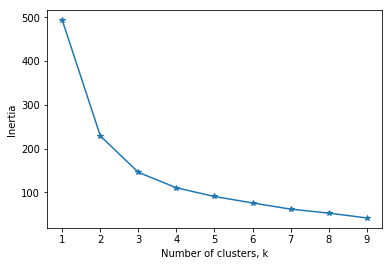

In [59]:
ks = range(1,10)
inertias = []

for k in ks:
    #Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    #Fit model to samples
    model.fit(X_test_1)
    
    #Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
#Plot kx vs inertias
plt.plot(ks, inertias, '-*')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

from yellowbrick.classifier import ConfusionMatrix

In [61]:
X_0 = wine0.drop(['Wine', 'Wine_name'], axis = 1)
y_0 = wine0.Wine_name
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0,y_0, test_size = 0.2, random_state = 1)

In [62]:
names = [1,2,3]
names1 = ['Barbera', 'Barolo', 'Gringnolio']

In [63]:
def model_fit(x):
    x.fit(X_train_0, y_train_0)
    y_pred = x.predict(X_test_0)
   
    model_fit.accuracy = accuracy_score(y_pred, y_test_0)
    print('Accuracy Score',accuracy_score(y_pred, y_test_0))
    print(classification_report(y_pred, y_test_0))
        
#     classes = names1
#     model_cm = ConfusionMatrix(ConfusionMatrix(x, classes=classes),
#                               label_encoder = {1:'Barbera', 2:'Barolo', 3:'Gringnolio'})
#     model_cm.fit(X_train_0, y_train_0)
#     model_cm.score(X_test_0, y_test_0)
#     model_cm.poof()

In [64]:
list = []
for i in range(1,20):
    model_fit(KNeighborsClassifier(n_neighbors = i))
    list.append(model_fit.accuracy)
list

Accuracy Score 0.75
              precision    recall  f1-score   support

     Barbera       0.86      0.92      0.89        13
      Barolo       0.77      0.67      0.71        15
  Gringnolio       0.56      0.62      0.59         8

   micro avg       0.75      0.75      0.75        36
   macro avg       0.73      0.74      0.73        36
weighted avg       0.75      0.75      0.75        36

Accuracy Score 0.6111111111111112
              precision    recall  f1-score   support

     Barbera       0.86      0.86      0.86        14
      Barolo       0.77      0.53      0.62        19
  Gringnolio       0.00      0.00      0.00         3

   micro avg       0.61      0.61      0.61        36
   macro avg       0.54      0.46      0.49        36
weighted avg       0.74      0.61      0.66        36

Accuracy Score 0.6388888888888888
              precision    recall  f1-score   support

     Barbera       0.86      0.80      0.83        15
      Barolo       0.62      0.62      0.

[0.75,
 0.6111111111111112,
 0.6388888888888888,
 0.6111111111111112,
 0.6388888888888888,
 0.6388888888888888,
 0.6944444444444444,
 0.6666666666666666,
 0.75,
 0.6666666666666666,
 0.7222222222222222,
 0.75,
 0.7222222222222222,
 0.7777777777777778,
 0.7222222222222222,
 0.7222222222222222,
 0.75,
 0.7777777777777778,
 0.75]

In [65]:
model_fit(KNeighborsClassifier(n_neighbors = 14))
KNN = model_fit.accuracy

Accuracy Score 0.7777777777777778
              precision    recall  f1-score   support

     Barbera       0.86      0.92      0.89        13
      Barolo       0.77      0.77      0.77        13
  Gringnolio       0.67      0.60      0.63        10

   micro avg       0.78      0.78      0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.77      0.78      0.77        36



In [66]:
from sklearn.linear_model import LogisticRegression
model_fit(LogisticRegression())
Logistic = model_fit.accuracy

Accuracy Score 0.9444444444444444
              precision    recall  f1-score   support

     Barbera       0.93      1.00      0.96        13
      Barolo       1.00      0.87      0.93        15
  Gringnolio       0.89      1.00      0.94         8

   micro avg       0.94      0.94      0.94        36
   macro avg       0.94      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [67]:
from sklearn.naive_bayes import GaussianNB
model_fit(GaussianNB())
Gaussian = model_fit.accuracy

Accuracy Score 0.9722222222222222
              precision    recall  f1-score   support

     Barbera       1.00      0.93      0.97        15
      Barolo       0.92      1.00      0.96        12
  Gringnolio       1.00      1.00      1.00         9

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [68]:
from sklearn import tree
model_fit(tree.DecisionTreeClassifier())
Tree = model_fit.accuracy

Accuracy Score 0.9166666666666666
              precision    recall  f1-score   support

     Barbera       0.93      0.93      0.93        14
      Barolo       0.92      0.86      0.89        14
  Gringnolio       0.89      1.00      0.94         8

   micro avg       0.92      0.92      0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



In [69]:
from sklearn.ensemble import RandomForestClassifier
model_fit(RandomForestClassifier(n_estimators = 100, max_depth =10, random_state = 1))
RandomForest = model_fit.accuracy

Accuracy Score 0.9722222222222222
              precision    recall  f1-score   support

     Barbera       1.00      0.93      0.97        15
      Barolo       0.92      1.00      0.96        12
  Gringnolio       1.00      1.00      1.00         9

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [70]:
model_fit(XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=50, silent=True, 
                        objective='binary:logistic', booster='gbtree', n_jobs=1, 
                        nthread=None, gamma=0, min_child_weight=10, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
                        seed=1, missing=None))
XGBClf = model_fit.accuracy

Accuracy Score 0.9722222222222222
              precision    recall  f1-score   support

     Barbera       1.00      0.93      0.97        15
      Barolo       0.92      1.00      0.96        12
  Gringnolio       1.00      1.00      1.00         9

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [71]:
from sklearn.ensemble import GradientBoostingClassifier
model_fit(GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=220, subsample=1.0, 
                           criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_decrease=0.0, 
                           min_impurity_split=None, init=None, random_state=1, max_features=None, 
                           verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', 
                           validation_fraction=0.1, n_iter_no_change=None, tol=0.0001))
GradientClf = model_fit.accuracy

Accuracy Score 0.9722222222222222
              precision    recall  f1-score   support

     Barbera       1.00      0.93      0.97        15
      Barolo       0.92      1.00      0.96        12
  Gringnolio       1.00      1.00      1.00         9

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [72]:
save_file = wine0
save_file['Prediction of Wine'] = kmeans.fit_predict(X_3)
save_file[['Wine_name', 'Prediction of Wine']].to_csv('Wine_Data_cluster_wine GradientCLF.csv')
#Download test results to file with wine prediction included for wine 0 GradientCLF

In [73]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 7 hours 35 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 24 days
H2O cluster name:,H2O_from_python_m_vwqcyl
H2O cluster total nodes:,1
H2O cluster free memory:,1.193 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [74]:
# Load data into H2O
df = h2o.H2OFrame(wine0)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
df.describe()

Rows:178
Cols:16




,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine_name,Prediction of Wine
type,int,real,real,real,real,int,real,real,real,real,real,real,real,int,enum,int
mins,1.0,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0,,0.0
mean,1.9382022471910112,13.000617977528085,2.336348314606743,2.366516853932584,19.494943820224723,99.74157303370781,2.295112359550562,2.0292696629213474,0.36185393258426946,1.5908988764044947,5.058089882022471,0.9574494382022474,2.6116853932584254,746.8932584269659,,0.915730337078652
maxs,3.0,14.83,5.8,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.0,1.71,4.0,1680.0,,2.0
sigma,0.7750349899850563,0.811826538005858,1.1171460976144625,0.27434400906081485,3.339563767173504,14.282483515295652,0.6258510488339892,0.9988586850169471,0.12445334029667941,0.5723588626747612,2.318285871822413,0.22857156582982327,0.7099904287650503,314.9074742768492,,0.7801780003190342
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,62
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Barbera,2.0
1,1.0,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0,Barbera,2.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0,Barbera,2.0


In [76]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train_aml = splits[0]
test = splits[1]
y = 'Wine_name'
x = train_aml.columns

In [77]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = train_aml)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [78]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
GBM_2_AutoML_20190115_185250,0,0.0479965,0.0781302,0.00610432
GBM_3_AutoML_20190115_185250,0,0.0490066,0.0785743,0.00617392
GLM_grid_1_AutoML_20190115_185250_model_1,0,0.0451176,0.0907201,0.00823014
GBM_4_AutoML_20190115_185250,0,0.0490066,0.0785743,0.00617392
XGBoost_2_AutoML_20190115_185250,0.00680272,0.298729,0.265812,0.070656
StackedEnsemble_AllModels_AutoML_20190115_185250,0.00680272,0.0211488,0.0589817,0.00347885
GBM_1_AutoML_20190115_185250,0.00680272,0.0380928,0.0867772,0.00753028
XGBoost_1_AutoML_20190115_185250,0.00680272,0.130903,0.141356,0.0199815
XRT_1_AutoML_20190115_185250,0.0136054,0.351745,0.160958,0.0259075
DRF_1_AutoML_20190115_185250,0.0136054,0.358819,0.170571,0.0290944


In [79]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Barbera,Barolo,Gringnolio
Barbera,0.985478,0.00729506,0.00722688
Barbera,0.967985,0.0251994,0.00681591
Barbera,0.967852,0.0224691,0.00967852
Barbera,0.955353,0.0345292,0.0101181
Barbera,0.979098,0.0104959,0.0104058
Barbera,0.97679,0.0162893,0.00692075
Barbera,0.983789,0.00805398,0.00815662
Barolo,0.0211251,0.962542,0.016333
Barolo,0.00797254,0.984054,0.00797299
Barolo,0.0397257,0.91471,0.0455644


In [80]:
pred = pred['predict'].as_data_frame().predict
pred.value_counts()

Barolo        13
Gringnolio     9
Barbera        7
Name: predict, dtype: int64

In [81]:
amlCLF = accuracy_score(pred, test[['Wine_name']].as_data_frame())
amlCLF

1.0

In [82]:
scores_list_1 = ['KNN','Logistic','Gaussian','Tree','RandomForest','XGBClassifier', 'GradientClassifier','amlCLF']
scores_1 = [KNN, Logistic, Gaussian, Tree, RandomForest, XGBClf, GradientClf, amlCLF]

In [83]:
score_df_classification = pd.DataFrame([scores_list_1, scores_1]).T

In [84]:
score_df_classification.index = score_df_classification[0]
del score_df_classification[0]
score_df_classification

,1
0,
KNN,0.777778
Logistic,0.944444
Gaussian,0.972222
Tree,0.916667
RandomForest,0.972222
XGBClassifier,0.972222
GradientClassifier,0.972222
amlCLF,1


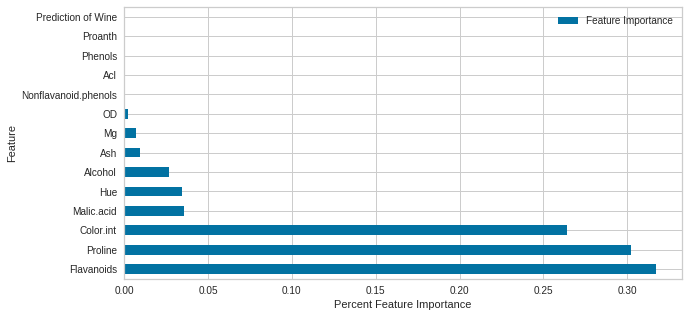

In [96]:
m = (GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                                             n_estimators=220, subsample=1.0, 
                                                             criterion='friedman_mse', min_samples_split=2, 
                                                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                                             max_depth=2, min_impurity_decrease=0.0, 
                                                             min_impurity_split=None, init=None, 
                                                             random_state=1, max_features=None, verbose=0, 
                                                             max_leaf_nodes=None, warm_start=False, 
                                                             presort='auto', validation_fraction=0.1, 
                                                             n_iter_no_change=None, tol=0.0001).fit(X_train_0, y_train_0))
x = pd.DataFrame(m.feature_importances_,X_train_0.columns)
pd.DataFrame(x[0].sort_values(ascending = False)[0:20]).iloc[:,:1].plot.barh(figsize=(10,5))
plt.legend(['Feature Importance'])
plt.xlabel('Percent Feature Importance')
plt.ylabel('Feature')
plt.show()

In [86]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


In [87]:
wine0

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine_name,Prediction of Wine
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,Barbera,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050,Barbera,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185,Barbera,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480,Barbera,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735,Barbera,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450,Barbera,2
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290,Barbera,2
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295,Barbera,2
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045,Barbera,2
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,Barbera,2


In [88]:
predictor = wine0.drop(['Wine', 'Wine_name', 'Prediction of Wine'], axis = 1).as_matrix()
target = to_categorical(wine0['Wine'])

ncols = predictor.shape[1]
# The very first layer of Keras needs to have the number of columns in the X data 

In [89]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (ncols,)))
for i in range (1,20):
    model.add(Dense(i,activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
# softmax is a part of gradient descent 
# 'relu' = Rectified Linear Unit - the most commonly used activation function in deep learning models. 
# The function returns 0 if it receives any negative input, but for any positive value  x  it returns 
# that value back. So it can be written as  f(x)=max(0,x) . 

In [90]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#custom_adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# ADAM helps us achieve the lowest point in the valley and the best learning rate
# ADAM is an optimisation algorithm for updating the parameters and minimising the cost of 
# the neural network, which is proved to be very effective.
# Categorical is for logistic regression
# https://keras.io/optimizers/

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 36        
__________

In [92]:
predictor.shape, target.shape

((178, 13), (178, 4))

In [93]:
model.fit(predictor, target, verbose=1)

Epoch 1/1
178/178 [==============================] - ETA: 9s - loss: 1.3863 - acc: 0.0000e+0 - 2s 12ms/step - loss: 1.3854 - acc: 0.3146
